<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #3: ARIMAX, Compositions

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

<span style="color:red; font-size: 14pt;"> DEADLINE: 10 October 2017 23:59:59 </span>

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 


<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 2**  Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 3** Что значит смешиваемость (mixability) игры (в теории агрегирующего алгоритма)?

<Ответ>

**Вопрос 4**: Верно ли, что для смешиваемых игр процесс потерь любой композиции (любого алгоритма) будет расти со временем (с ростом $t$) не быстрее, чем процесс потерь лучшего из базовых алгоритмов? Если нет - приведит пример, когда это не так.

### $$ \mathrm{Loss}_{Composition}(T)\leq \inf\limits_{BA} \mathrm{Loss}_{BA}(T)+C$$

<Ответ>

<h1 align="center">2. Contest: electricity comsumption contest (80%)</h1>
Take part in <a href='https://www.kaggle.com/t/de102b28cae74e6ead7492ff12efbc63'>contest</a>.
<span style='color:red'> You need to send the final code that is used for building forecast.</span>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from tqdm import tqdm

from sklearn import cross_validation
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Read data

In [2]:
Train = pd.read_csv("train.csv", index_col='ID')
sample_submission = pd.read_csv("SubmissionSample.csv", index_col='ID')

In [3]:
sample_submission.head()

,PREDICTED
ID,
16707,100000
16708,100000
16709,100000
16710,100000
16711,100000


In [4]:
Train[1030:1090]

,Date,tsID,ACTUAL,Temp,Saturday,Sunday
ID,,,,,,
1031,27.10.2012,4,32194.01,4.0,1.0,0
1032,28.10.2012,4,31246.77,5.0,0.0,1
1033,29.10.2012,4,33454.83,10.5,0.0,0
1034,30.10.2012,4,33894.82,8.8,0.0,0
1035,31.10.2012,4,33838.25,10.5,0.0,0
1036,01.11.2012,4,NaN,3.0,0.0,0
1037,02.11.2012,4,NaN,1.8,0.0,0
1038,03.11.2012,4,NaN,0.0,1.0,0
1039,04.11.2012,4,NaN,2.0,0.0,1


In [5]:
ids = set(ind[0] for ind in Train[['tsID']].values)
print(ids)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}


In [6]:
Train[Train['tsID'] == 22].values

array([['01.01.2010', 22, 407219.0, 13.0, 0.0, 1],
       ['02.01.2010', 22, 412267.0, 9.0, 0.0, 1],
       ['03.01.2010', 22, 420959.0, 7.8, 0.0, 1],
       ..., 
       ['10.05.2012', 22, nan, -26.7, 0.0, 1],
       ['11.05.2012', 22, nan, -19.6, 0.0, 0],
       ['12.05.2012', 22, nan, -12.9, 0.0, 0]], dtype=object)

# For first ts

In [7]:
DAYS_FOR_PREDICT = 30
cur_tsID = 1

## Prepare data for linear regression

In [8]:
class Preprocessor:
    scaler = 0
    
    @staticmethod
    def prepare_ts(train, cur_tsID):
        ts = train[train['tsID'] == cur_tsID].drop(['tsID'], axis=1)
        ts.index = [pd.Timestamp(x) for x in ts['Date']]
        ts = ts.drop(labels='Date', axis=1)
        return ts.dropna()
        
    @staticmethod
    def scale(ts):
        Preprocessor.scaler = MinMaxScaler()
        return Preprocessor.scaler.fit_transform(ts.values)
    
    @staticmethod
    def invert_scaling(y):
        inv_y = np.array([[[actual, 0, 0, 0] for actual in line] for line in y])
        inv_y = inv_y.reshape((inv_y.shape[0], inv_y.shape[1], 4))

        inv_y = np.array([Preprocessor.scaler.inverse_transform(inv_y[i]) for i, v in enumerate(inv_y)])
        inv_y = inv_y[:,:, 0]
        return inv_y

In [9]:
ts = Preprocessor.prepare_ts(Train, cur_tsID)

In [10]:
ts.head()

,ACTUAL,Temp,Saturday,Sunday
2010-01-01,90468.0,22.5,0.0,1
2010-02-01,92764.0,20.0,1.0,0
2010-03-01,94791.0,21.0,0.0,1
2010-04-01,98010.0,16.8,0.0,1
2010-05-01,100975.0,19.2,0.0,1


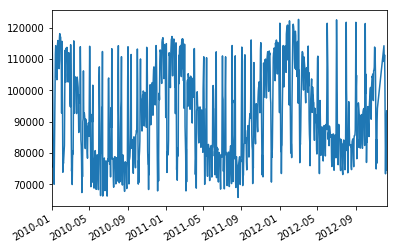

In [11]:
ts['ACTUAL'].plot()

In [12]:
scaled = Preprocessor.scale(ts)

In [13]:
print(scaled.shape)
print(scaled)

(1035, 4)
[[ 0.43329581  0.90243902  0.          1.        ]
 [ 0.47368421  0.86178862  1.          0.        ]
 [ 0.5093407   0.87804878  0.          1.        ]
 ..., 
 [ 0.7128483   0.40650407  0.          0.        ]
 [ 0.71411483  0.37398374  0.          0.        ]
 [ 0.73237405  0.3902439   0.          0.        ]]


In [14]:
class SamplesGenerator:
    
    @staticmethod
    def _clean_supervised(n_vars, n_out):
        # names of columns, which won'n predict
        n_vars = 1 if type(scaled) is list else scaled.shape[1]
        bad_names = list()
        for i in range(0, n_out):
            if i == 0:
                bad_names += [('var%d(t)' % (j+1)) for j in range(1, n_vars)]
            else:
                bad_names += [('var%d(t+%d)' % (j+1, i)) for j in range(1, n_vars)]
        return bad_names
    
    @staticmethod
    def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = pd.DataFrame(data)
        cols, names = list(), list()
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        # put it all together
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        if dropnan:
            agg.dropna(inplace=True)
            
        # drop columns, which won'n predict
        bad_names = SamplesGenerator._clean_supervised(n_vars, n_out)
        agg = agg.drop(labels=bad_names, axis=1)
        return agg
    
    @staticmethod
    def train_and_test(reframed, test_prop=0.2):
        # split into train and test sets
        values = reframed.values
        if isinstance(test_prop, float):
            n_train_days = (int)(reframed.shape[0] * (1-test_prop))
        elif isinstance(test_prop, int):
            n_train_days = (int)(reframed.shape[0] -test_prop)
        train = values[:n_train_days, :]
        test = values[n_train_days:, :]
        # split into input and outputs
        train_X, train_y = train[:, :-DAYS_FOR_PREDICT], train[:, -DAYS_FOR_PREDICT:]
        test_X, test_y = test[:, :-DAYS_FOR_PREDICT], test[:, -DAYS_FOR_PREDICT:]
        return train_X, train_y, test_X, test_y

In [15]:
reframed = SamplesGenerator.series_to_supervised(scaled, n_in=(int)(2*DAYS_FOR_PREDICT), n_out=DAYS_FOR_PREDICT)
#reframed.drop(reframed.columns[[22, 23]], axis=1, inplace=True)

In [16]:
reframed.columns

Index(['var1(t-60)', 'var2(t-60)', 'var3(t-60)', 'var4(t-60)', 'var1(t-59)',
       'var2(t-59)', 'var3(t-59)', 'var4(t-59)', 'var1(t-58)', 'var2(t-58)',
       ...
       'var1(t+20)', 'var1(t+21)', 'var1(t+22)', 'var1(t+23)', 'var1(t+24)',
       'var1(t+25)', 'var1(t+26)', 'var1(t+27)', 'var1(t+28)', 'var1(t+29)'],
      dtype='object', length=270)

In [17]:
reframed

,var1(t-60),var2(t-60),var3(t-60),var4(t-60),var1(t-59),var2(t-59),var3(t-59),var4(t-59),var1(t-58),var2(t-58),...,var1(t+20),var1(t+21),var1(t+22),var1(t+23),var1(t+24),var1(t+25),var1(t+26),var1(t+27),var1(t+28),var1(t+29)
60,0.433296,0.902439,0.0,1.0,0.473684,0.861789,1.0,0.0,0.509341,0.878049,...,0.669628,0.676189,0.659601,0.641711,0.617242,0.468882,0.364745,0.575975,0.555042,0.532437
61,0.473684,0.861789,1.0,0.0,0.509341,0.878049,0.0,1.0,0.565965,0.809756,...,0.676189,0.659601,0.641711,0.617242,0.468882,0.364745,0.575975,0.555042,0.532437,0.521901
62,0.509341,0.878049,0.0,1.0,0.565965,0.809756,0.0,1.0,0.618122,0.848780,...,0.659601,0.641711,0.617242,0.468882,0.364745,0.575975,0.555042,0.532437,0.521901,0.489551
63,0.565965,0.809756,0.0,1.0,0.618122,0.848780,0.0,1.0,0.665687,0.813008,...,0.641711,0.617242,0.468882,0.364745,0.575975,0.555042,0.532437,0.521901,0.489551,0.359854
64,0.618122,0.848780,0.0,1.0,0.665687,0.813008,0.0,1.0,0.664016,0.822764,...,0.617242,0.468882,0.364745,0.575975,0.555042,0.532437,0.521901,0.489551,0.359854,0.322280
65,0.665687,0.813008,0.0,1.0,0.664016,0.822764,0.0,1.0,0.685547,0.845528,...,0.468882,0.364745,0.575975,0.555042,0.532437,0.521901,0.489551,0.359854,0.322280,0.484450
66,0.664016,0.822764,0.0,1.0,0.685547,0.845528,0.0,1.0,0.661114,0.788618,...,0.364745,0.575975,0.555042,0.532437,0.521901,0.489551,0.359854,0.322280,0.484450,0.413876
67,0.685547,0.845528,0.0,1.0,0.661114,0.788618,1.0,0.0,0.655309,0.804878,...,0.575975,0.555042,0.532437,0.521901,0.489551,0.359854,0.322280,0.484450,0.413876,0.390761
68,0.661114,0.788618,1.0,0.0,0.655309,0.804878,0.0,1.0,0.843249,0.731707,...,0.555042,0.532437,0.521901,0.489551,0.359854,0.322280,0.484450,0.413876,0.390761,0.389864
69,0.655309,0.804878,0.0,1.0,0.843249,0.731707,0.0,0.0,0.853064,0.699187,...,0.532437,0.521901,0.489551,0.359854,0.322280,0.484450,0.413876,0.390761,0.389864,0.404904


## Train and test

In [18]:
train_X, train_y, test_X, test_y = SamplesGenerator.train_and_test(reframed, test_prop=1)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(945, 240) (945, 30) (1, 240) (1, 30)


## Linear regression

In [19]:
class Predictor:
    def __init__(self):
        self.lr = LinearRegression()
        
    def fit(self, X, y):
        self.lr.fit(X.squeeze(), y)
        
    def predict(self, X):
        # make a prediction
        lr_yhat = self.lr.predict(X)
        # invert scaling for forecast
        return Preprocessor.invert_scaling(lr_yhat)
    
    @staticmethod
    def write_forecast(Train, cur_tsID, lr_inv_yhat_last):
        indexes = Train[Train['tsID'] == cur_tsID][pd.isnull(Train['ACTUAL'])].index
        forecast = pd.DataFrame(lr_inv_yhat_last, index=indexes, columns=['PREDICTED'])
        sample_submission.loc[indexes, :] = forecast

In [20]:
lr = Predictor()
lr.fit(train_X, train_y)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [21]:
lr_inv_yhat = lr.predict(test_X)

In [22]:
test_y = test_y.reshape((len(test_y), DAYS_FOR_PREDICT))
# invert scaling for actual
inv_y = Preprocessor.invert_scaling(test_y)

In [23]:
rmse2 = np.sqrt(mean_squared_error(inv_y, lr_inv_yhat))

print('Test RMSE:', rmse2)

Test RMSE: 2285.81266851


In [24]:
def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x - real values
    # y - forecasts
    qlt = (np.abs((x-y)/x))
    return qlt.mean()

In [25]:
print('Test MAPE:', np.mean([qualityMAPE(inv_y[i, :], lr_inv_yhat[i, :]) for i in range(inv_y.shape[0])]))

Test MAPE: 0.0193141147517


In [26]:
inv_y.shape

(1, 30)

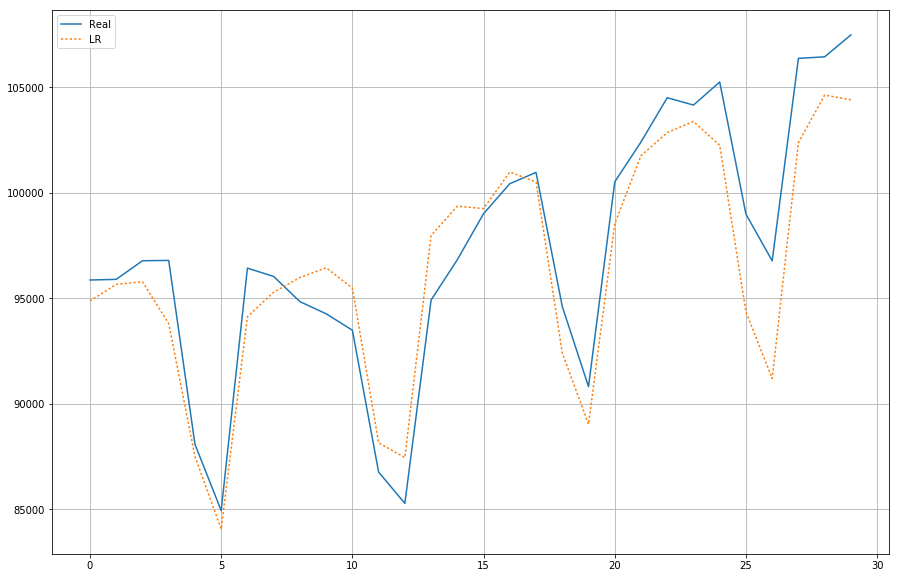

In [27]:
plt.figure(figsize=(15,10))
plt.plot(inv_y[-1], label='Real')
plt.plot(lr_inv_yhat[-1], ':', label='LR')
plt.grid()
plt.legend()

### Forecast

In [29]:
Predictor.write_forecast(Train, cur_tsID, lr_inv_yhat[-1])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [30]:
sample_submission.head()

,PREDICTED
ID,
16707,94867.255762
16708,95655.354239
16709,95775.266836
16710,93799.071801
16711,87505.423006


# Forecast for all (linear regression)

In [31]:
DAYS_FOR_PREDICT = 30

In [36]:
for cur_tsID in tqdm(ids):
    # prepare data
    ts = Preprocessor.prepare_ts(Train, cur_tsID)
    scaled = Preprocessor.scale(ts)
    reframed = SamplesGenerator.series_to_supervised(scaled, n_in=2*DAYS_FOR_PREDICT, n_out=DAYS_FOR_PREDICT)
    train_X, train_y, test_X, test_y = SamplesGenerator.train_and_test(reframed, test_prop=1)
    
    # fitting model
    lr = Predictor()
    lr.fit(train_X, train_y)
    lr_inv_yhat = lr.predict(test_X)
    
    test_y = test_y.reshape((len(test_y), DAYS_FOR_PREDICT))
    # invert scaling for actual
    inv_y = Preprocessor.invert_scaling(test_y)
    
    # write forecast to sample_submission
    Predictor.write_forecast(Train, cur_tsID, lr_inv_yhat[-1])

  0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
100%|██████████| 22/22 [00:05<00:00,  4.79it/s]


# Forecast for all (neural networks)

In [48]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

In [49]:
DAYS_FOR_PREDICT = 30

In [58]:
def qualityMAPE_neural(x,y):
    # Mean absolute percentage error
    # x - real values
    # y - forecasts
    qlt = (tf.abs((x-y)/x))
    return tf.reduce_mean(qlt)

In [83]:
%%time
for cur_tsID in tqdm(ids):
    # prepare data
    ts = Preprocessor.prepare_ts(Train, cur_tsID)
    scaled = Preprocessor.scale(ts)
    reframed = SamplesGenerator.series_to_supervised(scaled, n_in=2*DAYS_FOR_PREDICT, n_out=DAYS_FOR_PREDICT)
    train_X, train_y, test_X, test_y = SamplesGenerator.train_and_test(reframed, test_prop=0.2)
    
    
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    
    # fitting model
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(DAYS_FOR_PREDICT))
    model.compile(loss='mae', optimizer='adam')
    history = model.fit(train_X, train_y, epochs=150, batch_size=128, validation_data=(test_X, test_y), 
                        verbose=1, shuffle=False)
    
    # make a prediction
    yhat = model.predict(test_X)
    # invert scaling for forecast
    inv_yhat = Preprocessor.invert_scaling(yhat)
    
    test_y = test_y.reshape((len(test_y), DAYS_FOR_PREDICT))
    # invert scaling for actual
    inv_y = Preprocessor.invert_scaling(test_y)
    
    # write forecast to sample_submission
    Predictor.write_forecast(Train, cur_tsID, inv_yhat[-1])

  0%|          | 0/22 [00:00<?, ?it/s]

Train on 756 samples, validate on 190 samples
Epoch 1/150
756/756 [==============================] - 10s - loss: 0.4220 - val_loss: 0.2362
Epoch 2/150
756/756 [==============================] - 0s - loss: 0.3238 - val_loss: 0.1819
Epoch 3/150
756/756 [==============================] - 0s - loss: 0.2602 - val_loss: 0.1523
Epoch 4/150
756/756 [==============================] - 0s - loss: 0.2242 - val_loss: 0.1509
Epoch 5/150
756/756 [==============================] - 0s - loss: 0.2083 - val_loss: 0.1559
Epoch 6/150
756/756 [==============================] - 0s - loss: 0.1989 - val_loss: 0.1527
Epoch 7/150
756/756 [==============================] - 0s - loss: 0.1902 - val_loss: 0.1447
Epoch 8/150
756/756 [==============================] - 0s - loss: 0.1810 - val_loss: 0.1359
Epoch 9/150
756/756 [==============================] - 0s - loss: 0.1714 - val_loss: 0.1265
Epoch 10/150
756/756 [==============================] - 0s - loss: 0.1612 - val_loss: 0.1170
Epoch 11/150
756/756 [==========

756/756 [==============================] - 0s - loss: 0.0492 - val_loss: 0.0490
Epoch 89/150
756/756 [==============================] - 0s - loss: 0.0495 - val_loss: 0.0506
Epoch 90/150
756/756 [==============================] - 0s - loss: 0.0497 - val_loss: 0.0528
Epoch 91/150
756/756 [==============================] - 0s - loss: 0.0486 - val_loss: 0.0518
Epoch 92/150
756/756 [==============================] - 0s - loss: 0.0478 - val_loss: 0.0491
Epoch 93/150
756/756 [==============================] - 0s - loss: 0.0481 - val_loss: 0.0482
Epoch 94/150
756/756 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0488
Epoch 95/150
756/756 [==============================] - 0s - loss: 0.0490 - val_loss: 0.0520
Epoch 96/150
756/756 [==============================] - 0s - loss: 0.0489 - val_loss: 0.0543
Epoch 97/150
756/756 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0510
Epoch 98/150
756/756 [==============================] - 0s - loss: 0.0469 - val_los

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
  5%|▍         | 1/22 [00:31<11:08, 31.81s/it]

Train on 756 samples, validate on 190 samples
Epoch 1/150
756/756 [==============================] - 8s - loss: 0.3531 - val_loss: 0.2527
Epoch 2/150
756/756 [==============================] - 0s - loss: 0.2848 - val_loss: 0.1861
Epoch 3/150
756/756 [==============================] - 0s - loss: 0.2444 - val_loss: 0.1440
Epoch 4/150
756/756 [==============================] - 0s - loss: 0.2163 - val_loss: 0.1154
Epoch 5/150
756/756 [==============================] - 0s - loss: 0.1945 - val_loss: 0.0976
Epoch 6/150
756/756 [==============================] - 0s - loss: 0.1791 - val_loss: 0.0915
Epoch 7/150
756/756 [==============================] - 0s - loss: 0.1676 - val_loss: 0.0912
Epoch 8/150
756/756 [==============================] - 0s - loss: 0.1574 - val_loss: 0.0909
Epoch 9/150
756/756 [==============================] - 0s - loss: 0.1477 - val_loss: 0.0901
Epoch 10/150
756/756 [==============================] - 0s - loss: 0.1384 - val_loss: 0.0901
Epoch 11/150
756/756 [===========

756/756 [==============================] - 0s - loss: 0.0417 - val_loss: 0.0813
Epoch 89/150
756/756 [==============================] - 0s - loss: 0.0401 - val_loss: 0.0709
Epoch 90/150
756/756 [==============================] - 0s - loss: 0.0393 - val_loss: 0.0587
Epoch 91/150
756/756 [==============================] - 0s - loss: 0.0425 - val_loss: 0.0805
Epoch 92/150
756/756 [==============================] - 0s - loss: 0.0397 - val_loss: 0.0737
Epoch 93/150
756/756 [==============================] - 0s - loss: 0.0389 - val_loss: 0.0592
Epoch 94/150
756/756 [==============================] - 0s - loss: 0.0420 - val_loss: 0.0758
Epoch 95/150
756/756 [==============================] - 0s - loss: 0.0392 - val_loss: 0.0771
Epoch 96/150
756/756 [==============================] - 0s - loss: 0.0388 - val_loss: 0.0627
Epoch 97/150
756/756 [==============================] - 0s - loss: 0.0403 - val_loss: 0.0670
Epoch 98/150
756/756 [==============================] - 0s - loss: 0.0399 - val_los

  9%|▉         | 2/22 [01:07<11:02, 33.11s/it]

Train on 756 samples, validate on 190 samples
Epoch 1/150
756/756 [==============================] - 5s - loss: 0.4642 - val_loss: 0.3190
Epoch 2/150
756/756 [==============================] - 0s - loss: 0.3441 - val_loss: 0.2485
Epoch 3/150
756/756 [==============================] - 0s - loss: 0.2783 - val_loss: 0.1997
Epoch 4/150
756/756 [==============================] - 0s - loss: 0.2353 - val_loss: 0.1639
Epoch 5/150
756/756 [==============================] - 0s - loss: 0.2036 - val_loss: 0.1303
Epoch 6/150
756/756 [==============================] - 0s - loss: 0.1803 - val_loss: 0.1118
Epoch 7/150
756/756 [==============================] - 0s - loss: 0.1655 - val_loss: 0.1035
Epoch 8/150
756/756 [==============================] - 0s - loss: 0.1556 - val_loss: 0.1012
Epoch 9/150
756/756 [==============================] - 0s - loss: 0.1477 - val_loss: 0.0985
Epoch 10/150
756/756 [==============================] - 0s - loss: 0.1395 - val_loss: 0.0946
Epoch 11/150
756/756 [===========

756/756 [==============================] - 0s - loss: 0.0530 - val_loss: 0.0427
Epoch 89/150
756/756 [==============================] - 0s - loss: 0.0530 - val_loss: 0.0432
Epoch 90/150
756/756 [==============================] - 0s - loss: 0.0523 - val_loss: 0.0434
Epoch 91/150
756/756 [==============================] - 0s - loss: 0.0525 - val_loss: 0.0414
Epoch 92/150
756/756 [==============================] - 0s - loss: 0.0528 - val_loss: 0.0428
Epoch 93/150
756/756 [==============================] - 0s - loss: 0.0522 - val_loss: 0.0444
Epoch 94/150
756/756 [==============================] - 0s - loss: 0.0517 - val_loss: 0.0418
Epoch 95/150
756/756 [==============================] - 0s - loss: 0.0528 - val_loss: 0.0411
Epoch 96/150
756/756 [==============================] - 0s - loss: 0.0521 - val_loss: 0.0451
Epoch 97/150
756/756 [==============================] - 0s - loss: 0.0514 - val_loss: 0.0422
Epoch 98/150
756/756 [==============================] - 0s - loss: 0.0519 - val_los

 14%|█▎        | 3/22 [01:31<09:33, 30.19s/it]

Train on 756 samples, validate on 190 samples
Epoch 1/150
756/756 [==============================] - 5s - loss: 0.3981 - val_loss: 0.1510
Epoch 2/150
756/756 [==============================] - 0s - loss: 0.2961 - val_loss: 0.1575
Epoch 3/150
756/756 [==============================] - 0s - loss: 0.2413 - val_loss: 0.1741
Epoch 4/150
756/756 [==============================] - 0s - loss: 0.2056 - val_loss: 0.1845ss: 0.195
Epoch 5/150
756/756 [==============================] - 0s - loss: 0.1835 - val_loss: 0.1891
Epoch 6/150
756/756 [==============================] - 0s - loss: 0.1715 - val_loss: 0.1839
Epoch 7/150
756/756 [==============================] - 0s - loss: 0.1628 - val_loss: 0.1736
Epoch 8/150
756/756 [==============================] - 0s - loss: 0.1551 - val_loss: 0.1606
Epoch 9/150
756/756 [==============================] - 0s - loss: 0.1480 - val_loss: 0.1457
Epoch 10/150
756/756 [==============================] - 0s - loss: 0.1415 - val_loss: 0.1310
Epoch 11/150
756/756 [==

756/756 [==============================] - 0s - loss: 0.0556 - val_loss: 0.0921
Epoch 89/150
756/756 [==============================] - 0s - loss: 0.0557 - val_loss: 0.0924
Epoch 90/150
756/756 [==============================] - 0s - loss: 0.0556 - val_loss: 0.0909
Epoch 91/150
756/756 [==============================] - 0s - loss: 0.0556 - val_loss: 0.0902
Epoch 92/150
756/756 [==============================] - ETA: 0s - loss: 0.052 - 0s - loss: 0.0552 - val_loss: 0.0894
Epoch 93/150
756/756 [==============================] - 0s - loss: 0.0550 - val_loss: 0.0915
Epoch 94/150
756/756 [==============================] - 0s - loss: 0.0549 - val_loss: 0.0923
Epoch 95/150
756/756 [==============================] - 0s - loss: 0.0551 - val_loss: 0.0938
Epoch 96/150
756/756 [==============================] - 0s - loss: 0.0548 - val_loss: 0.0899
Epoch 97/150
756/756 [==============================] - 0s - loss: 0.0549 - val_loss: 0.0907
Epoch 98/150
756/756 [==============================] - 0s 

 18%|█▊        | 4/22 [01:55<08:31, 28.41s/it]

Train on 756 samples, validate on 190 samples
Epoch 1/150
756/756 [==============================] - 6s - loss: 0.4051 - val_loss: 0.1881
Epoch 2/150
756/756 [==============================] - 0s - loss: 0.2715 - val_loss: 0.1619
Epoch 3/150
756/756 [==============================] - 0s - loss: 0.2151 - val_loss: 0.1715
Epoch 4/150
756/756 [==============================] - 0s - loss: 0.1894 - val_loss: 0.1653
Epoch 5/150
756/756 [==============================] - 0s - loss: 0.1735 - val_loss: 0.1465
Epoch 6/150
756/756 [==============================] - 0s - loss: 0.1613 - val_loss: 0.1295
Epoch 7/150
756/756 [==============================] - 0s - loss: 0.1505 - val_loss: 0.1197
Epoch 8/150
756/756 [==============================] - 0s - loss: 0.1406 - val_loss: 0.1151
Epoch 9/150
756/756 [==============================] - 0s - loss: 0.1322 - val_loss: 0.1118
Epoch 10/150
756/756 [==============================] - 0s - loss: 0.1251 - val_loss: 0.1081
Epoch 11/150
756/756 [===========

756/756 [==============================] - 0s - loss: 0.0508 - val_loss: 0.0582
Epoch 89/150
756/756 [==============================] - 0s - loss: 0.0506 - val_loss: 0.0568
Epoch 90/150
756/756 [==============================] - 0s - loss: 0.0496 - val_loss: 0.0572
Epoch 91/150
756/756 [==============================] - 0s - loss: 0.0491 - val_loss: 0.0580
Epoch 92/150
756/756 [==============================] - 0s - loss: 0.0492 - val_loss: 0.0587
Epoch 93/150
756/756 [==============================] - 0s - loss: 0.0490 - val_loss: 0.0595
Epoch 94/150
756/756 [==============================] - 0s - loss: 0.0493 - val_loss: 0.0591
Epoch 95/150
756/756 [==============================] - 0s - loss: 0.0496 - val_loss: 0.0582
Epoch 96/150
756/756 [==============================] - 0s - loss: 0.0497 - val_loss: 0.0572
Epoch 97/150
756/756 [==============================] - 0s - loss: 0.0495 - val_loss: 0.0565
Epoch 98/150
756/756 [==============================] - 0s - loss: 0.0489 - val_los

 23%|██▎       | 5/22 [02:18<07:36, 26.85s/it]

Train on 756 samples, validate on 190 samples
Epoch 1/150
756/756 [==============================] - 5s - loss: 0.3430 - val_loss: 0.2011
Epoch 2/150
756/756 [==============================] - 0s - loss: 0.2503 - val_loss: 0.1932
Epoch 3/150
756/756 [==============================] - 0s - loss: 0.2016 - val_loss: 0.1860
Epoch 4/150
756/756 [==============================] - 0s - loss: 0.1712 - val_loss: 0.1869
Epoch 5/150
756/756 [==============================] - 0s - loss: 0.1573 - val_loss: 0.1867
Epoch 6/150
756/756 [==============================] - 0s - loss: 0.1511 - val_loss: 0.1818
Epoch 7/150
756/756 [==============================] - 0s - loss: 0.1465 - val_loss: 0.1728
Epoch 8/150
756/756 [==============================] - 0s - loss: 0.1399 - val_loss: 0.1650
Epoch 9/150
756/756 [==============================] - 0s - loss: 0.1329 - val_loss: 0.1591
Epoch 10/150
756/756 [==============================] - 0s - loss: 0.1268 - val_loss: 0.1529
Epoch 11/150
756/756 [===========

756/756 [==============================] - 0s - loss: 0.0642 - val_loss: 0.1003
Epoch 89/150
756/756 [==============================] - 0s - loss: 0.0667 - val_loss: 0.0985
Epoch 90/150
756/756 [==============================] - 0s - loss: 0.0641 - val_loss: 0.1003
Epoch 91/150
756/756 [==============================] - 0s - loss: 0.0624 - val_loss: 0.1017
Epoch 92/150
756/756 [==============================] - 0s - loss: 0.0646 - val_loss: 0.0994
Epoch 93/150
756/756 [==============================] - 0s - loss: 0.0662 - val_loss: 0.0988
Epoch 94/150
756/756 [==============================] - 0s - loss: 0.0622 - val_loss: 0.1015
Epoch 95/150
756/756 [==============================] - 0s - loss: 0.0626 - val_loss: 0.1009
Epoch 96/150
756/756 [==============================] - 0s - loss: 0.0656 - val_loss: 0.0984
Epoch 97/150
756/756 [==============================] - 0s - loss: 0.0636 - val_loss: 0.1003
Epoch 98/150
756/756 [==============================] - 0s - loss: 0.0612 - val_los

 27%|██▋       | 6/22 [02:41<06:48, 25.56s/it]

Train on 756 samples, validate on 190 samples
Epoch 1/150
756/756 [==============================] - 5s - loss: 0.3016 - val_loss: 0.0961
Epoch 2/150
756/756 [==============================] - 0s - loss: 0.2401 - val_loss: 0.1001
Epoch 3/150
756/756 [==============================] - 0s - loss: 0.2070 - val_loss: 0.1183
Epoch 4/150
756/756 [==============================] - 0s - loss: 0.1865 - val_loss: 0.1297
Epoch 5/150
756/756 [==============================] - 0s - loss: 0.1703 - val_loss: 0.1280
Epoch 6/150
756/756 [==============================] - 0s - loss: 0.1547 - val_loss: 0.1197
Epoch 7/150
756/756 [==============================] - 0s - loss: 0.1398 - val_loss: 0.1120
Epoch 8/150
756/756 [==============================] - 0s - loss: 0.1272 - val_loss: 0.1060
Epoch 9/150
756/756 [==============================] - 0s - loss: 0.1175 - val_loss: 0.1017
Epoch 10/150
756/756 [==============================] - 0s - loss: 0.1099 - val_loss: 0.0976
Epoch 11/150
756/756 [===========

756/756 [==============================] - 0s - loss: 0.0595 - val_loss: 0.0703
Epoch 89/150
756/756 [==============================] - 0s - loss: 0.0587 - val_loss: 0.0744
Epoch 90/150
756/756 [==============================] - 0s - loss: 0.0566 - val_loss: 0.0710
Epoch 91/150
756/756 [==============================] - 0s - loss: 0.0579 - val_loss: 0.0696
Epoch 92/150
756/756 [==============================] - 0s - loss: 0.0607 - val_loss: 0.0743
Epoch 93/150
756/756 [==============================] - 0s - loss: 0.0568 - val_loss: 0.0728
Epoch 94/150
756/756 [==============================] - 0s - loss: 0.0564 - val_loss: 0.0701
Epoch 95/150
756/756 [==============================] - 0s - loss: 0.0596 - val_loss: 0.0721
Epoch 96/150
756/756 [==============================] - 0s - loss: 0.0568 - val_loss: 0.0743
Epoch 97/150
756/756 [==============================] - 0s - loss: 0.0555 - val_loss: 0.0708
Epoch 98/150
756/756 [==============================] - 0s - loss: 0.0584 - val_los

 32%|███▏      | 7/22 [03:05<06:14, 25.00s/it]

Train on 756 samples, validate on 190 samples
Epoch 1/150
756/756 [==============================] - 5s - loss: 0.3082 - val_loss: 0.1829
Epoch 2/150
756/756 [==============================] - 0s - loss: 0.2225 - val_loss: 0.1732
Epoch 3/150
756/756 [==============================] - 0s - loss: 0.1936 - val_loss: 0.1617
Epoch 4/150
756/756 [==============================] - 0s - loss: 0.1723 - val_loss: 0.1407
Epoch 5/150
756/756 [==============================] - 0s - loss: 0.1536 - val_loss: 0.1270
Epoch 6/150
756/756 [==============================] - 0s - loss: 0.1397 - val_loss: 0.1262
Epoch 7/150
756/756 [==============================] - 0s - loss: 0.1328 - val_loss: 0.1287
Epoch 8/150
756/756 [==============================] - 0s - loss: 0.1301 - val_loss: 0.1283
Epoch 9/150
756/756 [==============================] - 0s - loss: 0.1276 - val_loss: 0.1255
Epoch 10/150
756/756 [==============================] - 0s - loss: 0.1242 - val_loss: 0.1226
Epoch 11/150
756/756 [===========

756/756 [==============================] - 0s - loss: 0.0665 - val_loss: 0.0830
Epoch 89/150
756/756 [==============================] - 0s - loss: 0.0681 - val_loss: 0.0845
Epoch 90/150
756/756 [==============================] - 0s - loss: 0.0680 - val_loss: 0.0869
Epoch 91/150
756/756 [==============================] - 0s - loss: 0.0655 - val_loss: 0.0858
Epoch 92/150
756/756 [==============================] - 0s - loss: 0.0651 - val_loss: 0.0839
Epoch 93/150
756/756 [==============================] - 0s - loss: 0.0661 - val_loss: 0.0835
Epoch 94/150
756/756 [==============================] - 0s - loss: 0.0674 - val_loss: 0.0845
Epoch 95/150
756/756 [==============================] - 0s - loss: 0.0670 - val_loss: 0.0865
Epoch 96/150
756/756 [==============================] - 0s - loss: 0.0649 - val_loss: 0.0855
Epoch 97/150
756/756 [==============================] - 0s - loss: 0.0647 - val_loss: 0.0841
Epoch 98/150
756/756 [==============================] - 0s - loss: 0.0654 - val_los

 36%|███▋      | 8/22 [03:30<05:53, 25.27s/it]

Train on 756 samples, validate on 190 samples
Epoch 1/150
756/756 [==============================] - 8s - loss: 0.3156 - val_loss: 0.1219
Epoch 2/150
756/756 [==============================] - 0s - loss: 0.2368 - val_loss: 0.1320
Epoch 3/150
756/756 [==============================] - 0s - loss: 0.2062 - val_loss: 0.1459
Epoch 4/150
756/756 [==============================] - 0s - loss: 0.1905 - val_loss: 0.1531
Epoch 5/150
756/756 [==============================] - 0s - loss: 0.1813 - val_loss: 0.1510
Epoch 6/150
756/756 [==============================] - 0s - loss: 0.1741 - val_loss: 0.1426
Epoch 7/150
756/756 [==============================] - 0s - loss: 0.1666 - val_loss: 0.1322
Epoch 8/150
756/756 [==============================] - 0s - loss: 0.1588 - val_loss: 0.1232
Epoch 9/150
756/756 [==============================] - 0s - loss: 0.1513 - val_loss: 0.1166
Epoch 10/150
756/756 [==============================] - 0s - loss: 0.1446 - val_loss: 0.1123
Epoch 11/150
756/756 [===========

756/756 [==============================] - 0s - loss: 0.0604 - val_loss: 0.0600
Epoch 89/150
756/756 [==============================] - 0s - loss: 0.0609 - val_loss: 0.0591
Epoch 90/150
756/756 [==============================] - 0s - loss: 0.0585 - val_loss: 0.0600
Epoch 91/150
756/756 [==============================] - 0s - loss: 0.0591 - val_loss: 0.0604
Epoch 92/150
756/756 [==============================] - 0s - loss: 0.0605 - val_loss: 0.0587
Epoch 93/150
756/756 [==============================] - 0s - loss: 0.0589 - val_loss: 0.0593
Epoch 94/150
756/756 [==============================] - 0s - loss: 0.0578 - val_loss: 0.0598
Epoch 95/150
756/756 [==============================] - 0s - loss: 0.0590 - val_loss: 0.0601
Epoch 96/150
756/756 [==============================] - 0s - loss: 0.0606 - val_loss: 0.0584
Epoch 97/150
756/756 [==============================] - 0s - loss: 0.0571 - val_loss: 0.0595
Epoch 98/150
756/756 [==============================] - 0s - loss: 0.0579 - val_los

 41%|████      | 9/22 [03:57<05:34, 25.70s/it]

Train on 756 samples, validate on 190 samples
Epoch 1/150
756/756 [==============================] - 5s - loss: 0.3998 - val_loss: 0.1799
Epoch 2/150
756/756 [==============================] - 0s - loss: 0.2638 - val_loss: 0.1502
Epoch 3/150
756/756 [==============================] - 0s - loss: 0.1965 - val_loss: 0.1515
Epoch 4/150
756/756 [==============================] - 0s - loss: 0.1629 - val_loss: 0.1475
Epoch 5/150
756/756 [==============================] - 0s - loss: 0.1476 - val_loss: 0.1374
Epoch 6/150
756/756 [==============================] - 0s - loss: 0.1397 - val_loss: 0.1287
Epoch 7/150
756/756 [==============================] - 0s - loss: 0.1334 - val_loss: 0.1177
Epoch 8/150
756/756 [==============================] - 0s - loss: 0.1254 - val_loss: 0.1092
Epoch 9/150
756/756 [==============================] - 0s - loss: 0.1184 - val_loss: 0.1043
Epoch 10/150
756/756 [==============================] - 0s - loss: 0.1122 - val_loss: 0.0983
Epoch 11/150
756/756 [===========

756/756 [==============================] - 0s - loss: 0.0575 - val_loss: 0.0578
Epoch 89/150
756/756 [==============================] - 0s - loss: 0.0567 - val_loss: 0.0572
Epoch 90/150
756/756 [==============================] - 0s - loss: 0.0559 - val_loss: 0.0573
Epoch 91/150
756/756 [==============================] - 0s - loss: 0.0555 - val_loss: 0.0574
Epoch 92/150
756/756 [==============================] - 0s - loss: 0.0551 - val_loss: 0.0579
Epoch 93/150
756/756 [==============================] - 0s - loss: 0.0552 - val_loss: 0.0592
Epoch 94/150
756/756 [==============================] - 0s - loss: 0.0556 - val_loss: 0.0604
Epoch 95/150
756/756 [==============================] - 0s - loss: 0.0564 - val_loss: 0.0608
Epoch 96/150
756/756 [==============================] - 0s - loss: 0.0572 - val_loss: 0.0597
Epoch 97/150
756/756 [==============================] - 0s - loss: 0.0572 - val_loss: 0.0578
Epoch 98/150
756/756 [==============================] - 0s - loss: 0.0558 - val_los

 45%|████▌     | 10/22 [04:20<04:58, 24.85s/it]

Train on 756 samples, validate on 189 samples
Epoch 1/150
756/756 [==============================] - 5s - loss: 0.3759 - val_loss: 0.1552
Epoch 2/150
756/756 [==============================] - 0s - loss: 0.2480 - val_loss: 0.1415
Epoch 3/150
756/756 [==============================] - 0s - loss: 0.1851 - val_loss: 0.1659
Epoch 4/150
756/756 [==============================] - 0s - loss: 0.1636 - val_loss: 0.1596
Epoch 5/150
756/756 [==============================] - 0s - loss: 0.1473 - val_loss: 0.1355
Epoch 6/150
756/756 [==============================] - 0s - loss: 0.1329 - val_loss: 0.1204
Epoch 7/150
756/756 [==============================] - 0s - loss: 0.1217 - val_loss: 0.1125
Epoch 8/150
756/756 [==============================] - 0s - loss: 0.1119 - val_loss: 0.1066
Epoch 9/150
756/756 [==============================] - 0s - loss: 0.1034 - val_loss: 0.0991
Epoch 10/150
756/756 [==============================] - 0s - loss: 0.0965 - val_loss: 0.0915
Epoch 11/150
756/756 [===========

756/756 [==============================] - 0s - loss: 0.0484 - val_loss: 0.0440
Epoch 89/150
756/756 [==============================] - 0s - loss: 0.0490 - val_loss: 0.0438
Epoch 90/150
756/756 [==============================] - 0s - loss: 0.0493 - val_loss: 0.0435
Epoch 91/150
756/756 [==============================] - 0s - loss: 0.0480 - val_loss: 0.0437
Epoch 92/150
756/756 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0437
Epoch 93/150
756/756 [==============================] - 0s - loss: 0.0474 - val_loss: 0.0439
Epoch 94/150
756/756 [==============================] - 0s - loss: 0.0478 - val_loss: 0.0439
Epoch 95/150
756/756 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0436
Epoch 96/150
756/756 [==============================] - 0s - loss: 0.0488 - val_loss: 0.0433
Epoch 97/150
756/756 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0435
Epoch 98/150
756/756 [==============================] - 0s - loss: 0.0470 - val_los

 50%|█████     | 11/22 [04:43<04:25, 24.15s/it]

Train on 595 samples, validate on 149 samples
Epoch 1/150
595/595 [==============================] - 5s - loss: 0.3209 - val_loss: 0.4798
Epoch 2/150
595/595 [==============================] - 0s - loss: 0.2324 - val_loss: 0.3582
Epoch 3/150
595/595 [==============================] - 0s - loss: 0.1963 - val_loss: 0.2862
Epoch 4/150
595/595 [==============================] - 0s - loss: 0.1795 - val_loss: 0.2547
Epoch 5/150
595/595 [==============================] - 0s - loss: 0.1671 - val_loss: 0.2435
Epoch 6/150
595/595 [==============================] - 0s - loss: 0.1565 - val_loss: 0.2351
Epoch 7/150
595/595 [==============================] - 0s - loss: 0.1468 - val_loss: 0.2202
Epoch 8/150
595/595 [==============================] - 0s - loss: 0.1372 - val_loss: 0.1989
Epoch 9/150
595/595 [==============================] - 0s - loss: 0.1276 - val_loss: 0.1779
Epoch 10/150
595/595 [==============================] - 0s - loss: 0.1190 - val_loss: 0.1621
Epoch 11/150
595/595 [===========

595/595 [==============================] - 0s - loss: 0.0410 - val_loss: 0.0604
Epoch 89/150
595/595 [==============================] - 0s - loss: 0.0422 - val_loss: 0.0606
Epoch 90/150
595/595 [==============================] - 0s - loss: 0.0418 - val_loss: 0.0629
Epoch 91/150
595/595 [==============================] - 0s - loss: 0.0418 - val_loss: 0.0603
Epoch 92/150
595/595 [==============================] - 0s - loss: 0.0430 - val_loss: 0.0607
Epoch 93/150
595/595 [==============================] - 0s - loss: 0.0427 - val_loss: 0.0626
Epoch 94/150
595/595 [==============================] - 0s - loss: 0.0417 - val_loss: 0.0598
Epoch 95/150
595/595 [==============================] - 0s - loss: 0.0423 - val_loss: 0.0606
Epoch 96/150
595/595 [==============================] - 0s - loss: 0.0421 - val_loss: 0.0616
Epoch 97/150
595/595 [==============================] - 0s - loss: 0.0408 - val_loss: 0.0600
Epoch 98/150
595/595 [==============================] - 0s - loss: 0.0413 - val_los

 55%|█████▍    | 12/22 [05:04<03:52, 23.29s/it]

Train on 595 samples, validate on 149 samples
Epoch 1/150
595/595 [==============================] - 5s - loss: 0.3580 - val_loss: 0.6004
Epoch 2/150
595/595 [==============================] - 0s - loss: 0.2532 - val_loss: 0.4733
Epoch 3/150
595/595 [==============================] - 0s - loss: 0.2085 - val_loss: 0.3814
Epoch 4/150
595/595 [==============================] - 0s - loss: 0.1925 - val_loss: 0.3283
Epoch 5/150
595/595 [==============================] - 0s - loss: 0.1816 - val_loss: 0.3018
Epoch 6/150
595/595 [==============================] - 0s - loss: 0.1696 - val_loss: 0.2870
Epoch 7/150
595/595 [==============================] - 0s - loss: 0.1592 - val_loss: 0.2742
Epoch 8/150
595/595 [==============================] - 0s - loss: 0.1496 - val_loss: 0.2585
Epoch 9/150
595/595 [==============================] - 0s - loss: 0.1406 - val_loss: 0.2386
Epoch 10/150
595/595 [==============================] - 0s - loss: 0.1320 - val_loss: 0.2152
Epoch 11/150
595/595 [===========

595/595 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0552
Epoch 89/150
595/595 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0551
Epoch 90/150
595/595 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0552
Epoch 91/150
595/595 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0552
Epoch 92/150
595/595 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0550
Epoch 93/150
595/595 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0553
Epoch 94/150
595/595 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0553
Epoch 95/150
595/595 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0552
Epoch 96/150
595/595 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0554
Epoch 97/150
595/595 [==============================] - 0s - loss: 0.0428 - val_loss: 0.0550
Epoch 98/150
595/595 [==============================] - 0s - loss: 0.0441 - val_los

 59%|█████▉    | 13/22 [05:25<03:23, 22.65s/it]

Train on 595 samples, validate on 149 samples
Epoch 1/150
595/595 [==============================] - 5s - loss: 0.4497 - val_loss: 0.7337
Epoch 2/150
595/595 [==============================] - 0s - loss: 0.3468 - val_loss: 0.5974
Epoch 3/150
595/595 [==============================] - 0s - loss: 0.2795 - val_loss: 0.4749
Epoch 4/150
595/595 [==============================] - 0s - loss: 0.2360 - val_loss: 0.3813
Epoch 5/150
595/595 [==============================] - 0s - loss: 0.2117 - val_loss: 0.3219
Epoch 6/150
595/595 [==============================] - 0s - loss: 0.1987 - val_loss: 0.2907
Epoch 7/150
595/595 [==============================] - 0s - loss: 0.1885 - val_loss: 0.2742
Epoch 8/150
595/595 [==============================] - 0s - loss: 0.1791 - val_loss: 0.2626
Epoch 9/150
595/595 [==============================] - 0s - loss: 0.1704 - val_loss: 0.2520
Epoch 10/150
595/595 [==============================] - 0s - loss: 0.1626 - val_loss: 0.2416
Epoch 11/150
595/595 [===========

595/595 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0715
Epoch 89/150
595/595 [==============================] - 0s - loss: 0.0438 - val_loss: 0.0717
Epoch 90/150
595/595 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0707
Epoch 91/150
595/595 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0718
Epoch 92/150
595/595 [==============================] - 0s - loss: 0.0433 - val_loss: 0.0717
Epoch 93/150
595/595 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0709
Epoch 94/150
595/595 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0725
Epoch 95/150
595/595 [==============================] - 0s - loss: 0.0428 - val_loss: 0.0714
Epoch 96/150
595/595 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0714
Epoch 97/150
595/595 [==============================] - 0s - loss: 0.0438 - val_loss: 0.0728
Epoch 98/150
595/595 [==============================] - 0s - loss: 0.0426 - val_los

 64%|██████▎   | 14/22 [05:46<02:56, 22.07s/it]

Train on 595 samples, validate on 149 samples
Epoch 1/150
595/595 [==============================] - 5s - loss: 0.3362 - val_loss: 0.5775
Epoch 2/150
595/595 [==============================] - 0s - loss: 0.2481 - val_loss: 0.4547
Epoch 3/150
595/595 [==============================] - 0s - loss: 0.1987 - val_loss: 0.3636
Epoch 4/150
595/595 [==============================] - 0s - loss: 0.1760 - val_loss: 0.3129
Epoch 5/150
595/595 [==============================] - 0s - loss: 0.1679 - val_loss: 0.2941
Epoch 6/150
595/595 [==============================] - 0s - loss: 0.1621 - val_loss: 0.2926
Epoch 7/150
595/595 [==============================] - 0s - loss: 0.1564 - val_loss: 0.2941
Epoch 8/150
595/595 [==============================] - 0s - loss: 0.1512 - val_loss: 0.2911
Epoch 9/150
595/595 [==============================] - 0s - loss: 0.1468 - val_loss: 0.2822
Epoch 10/150
595/595 [==============================] - 0s - loss: 0.1429 - val_loss: 0.2695
Epoch 11/150
595/595 [===========

595/595 [==============================] - 0s - loss: 0.0703 - val_loss: 0.0875
Epoch 89/150
595/595 [==============================] - 0s - loss: 0.0730 - val_loss: 0.0874
Epoch 90/150
595/595 [==============================] - 0s - loss: 0.0679 - val_loss: 0.0862
Epoch 91/150
595/595 [==============================] - 0s - loss: 0.0715 - val_loss: 0.0874
Epoch 92/150
595/595 [==============================] - 0s - loss: 0.0707 - val_loss: 0.0870
Epoch 93/150
595/595 [==============================] - 0s - loss: 0.0677 - val_loss: 0.0873
Epoch 94/150
595/595 [==============================] - 0s - loss: 0.0716 - val_loss: 0.0876
Epoch 95/150
595/595 [==============================] - 0s - loss: 0.0684 - val_loss: 0.0876
Epoch 96/150
595/595 [==============================] - 0s - loss: 0.0682 - val_loss: 0.0886
Epoch 97/150
595/595 [==============================] - 0s - loss: 0.0713 - val_loss: 0.0889
Epoch 98/150
595/595 [==============================] - 0s - loss: 0.0669 - val_los

 68%|██████▊   | 15/22 [06:07<02:32, 21.74s/it]

Train on 594 samples, validate on 149 samples
Epoch 1/150
594/594 [==============================] - 5s - loss: 0.3321 - val_loss: 0.5082
Epoch 2/150
594/594 [==============================] - 0s - loss: 0.2522 - val_loss: 0.3809
Epoch 3/150
594/594 [==============================] - 0s - loss: 0.2035 - val_loss: 0.2902
Epoch 4/150
594/594 [==============================] - 0s - loss: 0.1729 - val_loss: 0.2327
Epoch 5/150
594/594 [==============================] - 0s - loss: 0.1560 - val_loss: 0.2069
Epoch 6/150
594/594 [==============================] - 0s - loss: 0.1465 - val_loss: 0.2015
Epoch 7/150
594/594 [==============================] - 0s - loss: 0.1385 - val_loss: 0.2011
Epoch 8/150
594/594 [==============================] - 0s - loss: 0.1315 - val_loss: 0.1976
Epoch 9/150
594/594 [==============================] - 0s - loss: 0.1251 - val_loss: 0.1888
Epoch 10/150
594/594 [==============================] - 0s - loss: 0.1185 - val_loss: 0.1744
Epoch 11/150
594/594 [===========

594/594 [==============================] - 0s - loss: 0.0532 - val_loss: 0.0803
Epoch 89/150
594/594 [==============================] - 0s - loss: 0.0517 - val_loss: 0.0795
Epoch 90/150
594/594 [==============================] - 0s - loss: 0.0523 - val_loss: 0.0816
Epoch 91/150
594/594 [==============================] - 0s - loss: 0.0531 - val_loss: 0.0804
Epoch 92/150
594/594 [==============================] - 0s - loss: 0.0514 - val_loss: 0.0788
Epoch 93/150
594/594 [==============================] - 0s - loss: 0.0512 - val_loss: 0.0808
Epoch 94/150
594/594 [==============================] - 0s - loss: 0.0520 - val_loss: 0.0817
Epoch 95/150
594/594 [==============================] - 0s - loss: 0.0518 - val_loss: 0.0798
Epoch 96/150
594/594 [==============================] - 0s - loss: 0.0510 - val_loss: 0.0795
Epoch 97/150
594/594 [==============================] - 0s - loss: 0.0512 - val_loss: 0.0812
Epoch 98/150
594/594 [==============================] - 0s - loss: 0.0522 - val_los

 73%|███████▎  | 16/22 [06:28<02:09, 21.51s/it]

Train on 595 samples, validate on 149 samples
Epoch 1/150
595/595 [==============================] - 5s - loss: 0.2813 - val_loss: 0.4420
Epoch 2/150
595/595 [==============================] - 0s - loss: 0.2106 - val_loss: 0.3301
Epoch 3/150
595/595 [==============================] - 0s - loss: 0.1758 - val_loss: 0.2601
Epoch 4/150
595/595 [==============================] - 0s - loss: 0.1553 - val_loss: 0.2203
Epoch 5/150
595/595 [==============================] - 0s - loss: 0.1462 - val_loss: 0.2037
Epoch 6/150
595/595 [==============================] - 0s - loss: 0.1423 - val_loss: 0.1974
Epoch 7/150
595/595 [==============================] - 0s - loss: 0.1392 - val_loss: 0.1942
Epoch 8/150
595/595 [==============================] - 0s - loss: 0.1364 - val_loss: 0.1925
Epoch 9/150
595/595 [==============================] - 0s - loss: 0.1338 - val_loss: 0.1930
Epoch 10/150
595/595 [==============================] - 0s - loss: 0.1313 - val_loss: 0.1921
Epoch 11/150
595/595 [===========

595/595 [==============================] - 0s - loss: 0.0725 - val_loss: 0.1013
Epoch 89/150
595/595 [==============================] - 0s - loss: 0.0730 - val_loss: 0.0996
Epoch 90/150
595/595 [==============================] - 0s - loss: 0.0716 - val_loss: 0.1010
Epoch 91/150
595/595 [==============================] - 0s - loss: 0.0719 - val_loss: 0.0998
Epoch 92/150
595/595 [==============================] - 0s - loss: 0.0709 - val_loss: 0.1010
Epoch 93/150
595/595 [==============================] - 0s - loss: 0.0712 - val_loss: 0.1000
Epoch 94/150
595/595 [==============================] - 0s - loss: 0.0703 - val_loss: 0.1009
Epoch 95/150
595/595 [==============================] - 0s - loss: 0.0706 - val_loss: 0.1003
Epoch 96/150
595/595 [==============================] - 0s - loss: 0.0699 - val_loss: 0.1010
Epoch 97/150
595/595 [==============================] - 0s - loss: 0.0702 - val_loss: 0.1006
Epoch 98/150
595/595 [==============================] - 0s - loss: 0.0695 - val_los

 77%|███████▋  | 17/22 [06:51<01:50, 22.11s/it]

Train on 595 samples, validate on 149 samples
Epoch 1/150
595/595 [==============================] - 7s - loss: 0.2797 - val_loss: 0.6011
Epoch 2/150
595/595 [==============================] - 0s - loss: 0.2347 - val_loss: 0.5239
Epoch 3/150
595/595 [==============================] - 0s - loss: 0.2110 - val_loss: 0.4607
Epoch 4/150
595/595 [==============================] - 0s - loss: 0.1975 - val_loss: 0.4136
Epoch 5/150
595/595 [==============================] - 0s - loss: 0.1896 - val_loss: 0.3817
Epoch 6/150
595/595 [==============================] - 0s - loss: 0.1834 - val_loss: 0.3610
Epoch 7/150
595/595 [==============================] - 0s - loss: 0.1773 - val_loss: 0.3461
Epoch 8/150
595/595 [==============================] - 0s - loss: 0.1714 - val_loss: 0.3318
Epoch 9/150
595/595 [==============================] - 0s - loss: 0.1660 - val_loss: 0.3167
Epoch 10/150
595/595 [==============================] - 0s - loss: 0.1610 - val_loss: 0.3020
Epoch 11/150
595/595 [===========

595/595 [==============================] - 0s - loss: 0.0573 - val_loss: 0.0861
Epoch 89/150
595/595 [==============================] - 0s - loss: 0.0565 - val_loss: 0.0875
Epoch 90/150
595/595 [==============================] - 0s - loss: 0.0571 - val_loss: 0.0856
Epoch 91/150
595/595 [==============================] - 0s - loss: 0.0561 - val_loss: 0.0872
Epoch 92/150
595/595 [==============================] - 0s - loss: 0.0568 - val_loss: 0.0851
Epoch 93/150
595/595 [==============================] - 0s - loss: 0.0556 - val_loss: 0.0870
Epoch 94/150
595/595 [==============================] - 0s - loss: 0.0566 - val_loss: 0.0850
Epoch 95/150
595/595 [==============================] - 0s - loss: 0.0551 - val_loss: 0.0866
Epoch 96/150
595/595 [==============================] - 0s - loss: 0.0560 - val_loss: 0.0846
Epoch 97/150
595/595 [==============================] - 0s - loss: 0.0545 - val_loss: 0.0858
Epoch 98/150
595/595 [==============================] - 0s - loss: 0.0552 - val_los

 82%|████████▏ | 18/22 [07:16<01:31, 22.79s/it]

Train on 595 samples, validate on 149 samples
Epoch 1/150
595/595 [==============================] - 6s - loss: 0.3449 - val_loss: 0.5047
Epoch 2/150
595/595 [==============================] - 0s - loss: 0.2504 - val_loss: 0.3783
Epoch 3/150
595/595 [==============================] - 0s - loss: 0.1924 - val_loss: 0.2862
Epoch 4/150
595/595 [==============================] - 0s - loss: 0.1645 - val_loss: 0.2338
Epoch 5/150
595/595 [==============================] - 0s - loss: 0.1537 - val_loss: 0.2139
Epoch 6/150
595/595 [==============================] - 0s - loss: 0.1490 - val_loss: 0.2138
Epoch 7/150
595/595 [==============================] - 0s - loss: 0.1455 - val_loss: 0.2204
Epoch 8/150
595/595 [==============================] - 0s - loss: 0.1426 - val_loss: 0.2264
Epoch 9/150
595/595 [==============================] - 0s - loss: 0.1402 - val_loss: 0.2294
Epoch 10/150
595/595 [==============================] - 0s - loss: 0.1380 - val_loss: 0.2286
Epoch 11/150
595/595 [===========

595/595 [==============================] - 0s - loss: 0.0682 - val_loss: 0.1104
Epoch 89/150
595/595 [==============================] - 0s - loss: 0.0680 - val_loss: 0.1095
Epoch 90/150
595/595 [==============================] - 0s - loss: 0.0681 - val_loss: 0.1098
Epoch 91/150
595/595 [==============================] - 0s - loss: 0.0680 - val_loss: 0.1113
Epoch 92/150
595/595 [==============================] - 0s - loss: 0.0675 - val_loss: 0.1132
Epoch 93/150
595/595 [==============================] - 0s - loss: 0.0668 - val_loss: 0.1108
Epoch 94/150
595/595 [==============================] - 0s - loss: 0.0669 - val_loss: 0.1114
Epoch 95/150
595/595 [==============================] - 0s - loss: 0.0668 - val_loss: 0.1117
Epoch 96/150
595/595 [==============================] - 0s - loss: 0.0671 - val_loss: 0.1142
Epoch 97/150
595/595 [==============================] - 0s - loss: 0.0658 - val_loss: 0.1136
Epoch 98/150
595/595 [==============================] - 0s - loss: 0.0656 - val_los

 86%|████████▋ | 19/22 [07:38<01:07, 22.56s/it]

Train on 595 samples, validate on 149 samples
Epoch 1/150
595/595 [==============================] - 6s - loss: 0.2660 - val_loss: 0.4793
Epoch 2/150
595/595 [==============================] - 0s - loss: 0.2163 - val_loss: 0.4036
Epoch 3/150
595/595 [==============================] - 0s - loss: 0.1947 - val_loss: 0.3545
Epoch 4/150
595/595 [==============================] - 0s - loss: 0.1839 - val_loss: 0.3251
Epoch 5/150
595/595 [==============================] - 0s - loss: 0.1760 - val_loss: 0.3081
Epoch 6/150
595/595 [==============================] - 0s - loss: 0.1689 - val_loss: 0.2968
Epoch 7/150
595/595 [==============================] - 0s - loss: 0.1621 - val_loss: 0.2854
Epoch 8/150
595/595 [==============================] - 0s - loss: 0.1552 - val_loss: 0.2710
Epoch 9/150
595/595 [==============================] - 0s - loss: 0.1482 - val_loss: 0.2547
Epoch 10/150
595/595 [==============================] - 0s - loss: 0.1411 - val_loss: 0.2367
Epoch 11/150
595/595 [===========

595/595 [==============================] - 0s - loss: 0.0433 - val_loss: 0.0978
Epoch 89/150
595/595 [==============================] - 0s - loss: 0.0422 - val_loss: 0.0951
Epoch 90/150
595/595 [==============================] - 0s - loss: 0.0427 - val_loss: 0.0906
Epoch 91/150
595/595 [==============================] - 0s - loss: 0.0432 - val_loss: 0.1000
Epoch 92/150
595/595 [==============================] - 0s - loss: 0.0425 - val_loss: 0.0940
Epoch 93/150
595/595 [==============================] - 0s - loss: 0.0429 - val_loss: 0.0924
Epoch 94/150
595/595 [==============================] - 0s - loss: 0.0418 - val_loss: 0.0988
Epoch 95/150
595/595 [==============================] - 0s - loss: 0.0416 - val_loss: 0.0934
Epoch 96/150
595/595 [==============================] - 0s - loss: 0.0421 - val_loss: 0.0947
Epoch 97/150
595/595 [==============================] - 0s - loss: 0.0405 - val_loss: 0.0984
Epoch 98/150
595/595 [==============================] - 0s - loss: 0.0409 - val_los

 91%|█████████ | 20/22 [07:59<00:44, 22.25s/it]

Train on 595 samples, validate on 149 samples
Epoch 1/150
595/595 [==============================] - 16s - loss: 0.3392 - val_loss: 0.5056
Epoch 2/150
595/595 [==============================] - 0s - loss: 0.2479 - val_loss: 0.3697
Epoch 3/150
595/595 [==============================] - 0s - loss: 0.1962 - val_loss: 0.2715
Epoch 4/150
595/595 [==============================] - 0s - loss: 0.1697 - val_loss: 0.2188
Epoch 5/150
595/595 [==============================] - 0s - loss: 0.1480 - val_loss: 0.2008
Epoch 6/150
595/595 [==============================] - 0s - loss: 0.1320 - val_loss: 0.1940
Epoch 7/150
595/595 [==============================] - 0s - loss: 0.1226 - val_loss: 0.1825
Epoch 8/150
595/595 [==============================] - 0s - loss: 0.1148 - val_loss: 0.1675
Epoch 9/150
595/595 [==============================] - 0s - loss: 0.1075 - val_loss: 0.1549
Epoch 10/150
595/595 [==============================] - 0s - loss: 0.1016 - val_loss: 0.1448
Epoch 11/150
595/595 [==========

595/595 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0895
Epoch 89/150
595/595 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0907
Epoch 90/150
595/595 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0905
Epoch 91/150
595/595 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0882
Epoch 92/150
595/595 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0910
Epoch 93/150
595/595 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0915
Epoch 94/150
595/595 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0917
Epoch 95/150
595/595 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0894
Epoch 96/150
595/595 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0922
Epoch 97/150
595/595 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0919
Epoch 98/150
595/595 [==============================] - 0s - loss: 0.0459 - val_los

 95%|█████████▌| 21/22 [08:32<00:25, 25.40s/it]

Train on 595 samples, validate on 149 samples
Epoch 1/150
595/595 [==============================] - 5s - loss: 0.3103 - val_loss: 0.4610
Epoch 2/150
595/595 [==============================] - 0s - loss: 0.2365 - val_loss: 0.3485
Epoch 3/150
595/595 [==============================] - 0s - loss: 0.1926 - val_loss: 0.2647
Epoch 4/150
595/595 [==============================] - 0s - loss: 0.1625 - val_loss: 0.2087
Epoch 5/150
595/595 [==============================] - 0s - loss: 0.1424 - val_loss: 0.1744
Epoch 6/150
595/595 [==============================] - 0s - loss: 0.1296 - val_loss: 0.1517
Epoch 7/150
595/595 [==============================] - 0s - loss: 0.1201 - val_loss: 0.1363
Epoch 8/150
595/595 [==============================] - 0s - loss: 0.1120 - val_loss: 0.1248
Epoch 9/150
595/595 [==============================] - 0s - loss: 0.1054 - val_loss: 0.1130
Epoch 10/150
595/595 [==============================] - 0s - loss: 0.0995 - val_loss: 0.1028
Epoch 11/150
595/595 [===========

595/595 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0718
Epoch 89/150
595/595 [==============================] - 0s - loss: 0.0429 - val_loss: 0.0710
Epoch 90/150
595/595 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0750
Epoch 91/150
595/595 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0717
Epoch 92/150
595/595 [==============================] - 0s - loss: 0.0436 - val_loss: 0.0713
Epoch 93/150
595/595 [==============================] - 0s - loss: 0.0427 - val_loss: 0.0730
Epoch 94/150
595/595 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0727
Epoch 95/150
595/595 [==============================] - 0s - loss: 0.0430 - val_loss: 0.0711
Epoch 96/150
595/595 [==============================] - 0s - loss: 0.0421 - val_loss: 0.0734
Epoch 97/150
595/595 [==============================] - 0s - loss: 0.0436 - val_loss: 0.0719
Epoch 98/150
595/595 [==============================] - 0s - loss: 0.0426 - val_los

100%|██████████| 22/22 [08:53<00:00, 24.27s/it]

CPU times: user 9min, sys: 1min 47s, total: 10min 47s
Wall time: 8min 53s


In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_133 (LSTM)              (None, 50)                58200     
_________________________________________________________________
dense_130 (Dense)            (None, 30)                1530      
Total params: 59,730
Trainable params: 59,730
Non-trainable params: 0
_________________________________________________________________


## Forecast

In [85]:
sample_submission

,PREDICTED
ID,
16707,96125.781079
16708,96897.754579
16709,97213.763991
16710,97137.992482
16711,90016.573546
16712,85677.058707
16713,96504.265901
16714,98413.493107
16715,99528.579869


In [86]:
# save forecast to disk for further submission
sample_submission.to_csv('result.csv')